In [5]:
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import floating_axes
from mpl_toolkits.axisartist import grid_finder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
config = {"font.family":'Times New Roman',"font.size": 12,"mathtext.fontset":'stix'}
rcParams.update(config)
import warnings
warnings.filterwarnings("ignore")

Text(0.01, 1.05, '(a)')

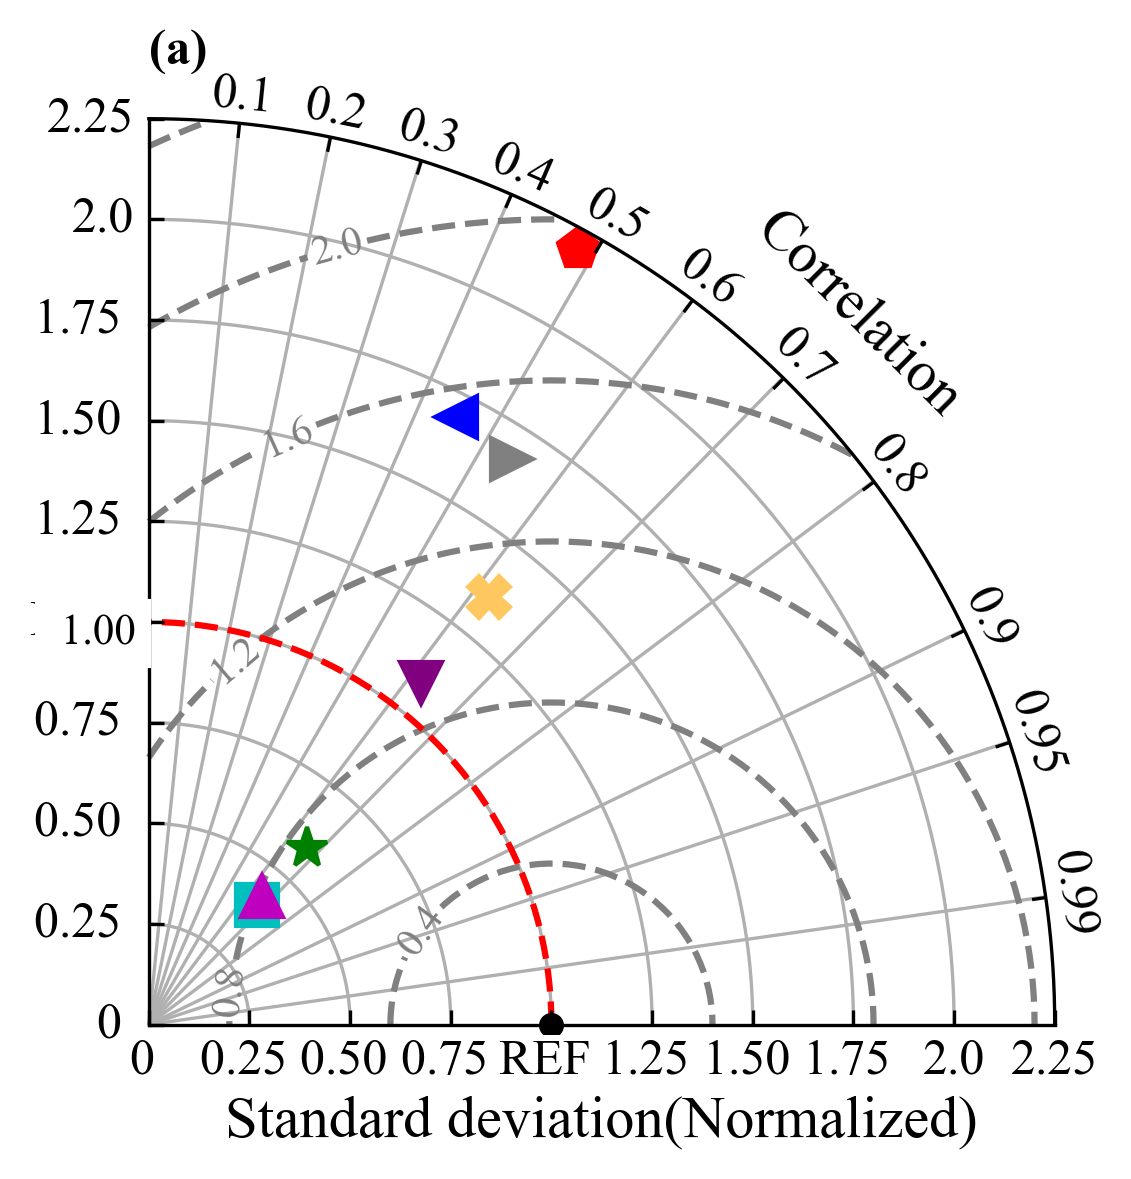

In [6]:
def set_tayloraxes(fig, location):
    trans = PolarAxes.PolarTransform()
    r1_locs = np.hstack((np.arange(1,10)/10.0,[0.95,0.99]))
    t1_locs = np.arccos(r1_locs)        
    gl1 = grid_finder.FixedLocator(t1_locs)    
    tf1 = grid_finder.DictFormatter(dict(zip(t1_locs, map(str,r1_locs))))
    r2_locs = np.arange(0,2.5,0.25)
    r2_labels = ['0 ', '0.25 ', '0.50 ', '0.75 ', 'REF ', '1.25 ', '1.50 ', '1.75 ','2.0','2.25']
    gl2 = grid_finder.FixedLocator(r2_locs)
    tf2 = grid_finder.DictFormatter(dict(zip(r2_locs, map(str,r2_labels))))
    ghelper = floating_axes.GridHelperCurveLinear(trans,extremes=(0,np.pi/2,0,2.25),
                                                  grid_locator1=gl1,tick_formatter1=tf1,
                                                  grid_locator2=gl2,tick_formatter2=tf2)
    ax = floating_axes.FloatingSubplot(fig, location, grid_helper=ghelper)
    fig.add_subplot(ax)

    ax.axis["top"].set_axis_direction("bottom")  
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation")
    ax.axis["top"].label.set_fontsize(14)
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard deviation(Normalized)")
    ax.axis["left"].label.set_fontsize(14)
    ax.axis["right"].set_axis_direction("top")   
    ax.axis["right"].toggle(ticklabels=True)
    ax.axis["right"].major_ticklabels.set_axis_direction("left")
    ax.axis["bottom"].set_visible(False)         
    ax.grid(True)
    polar_ax = ax.get_aux_axes(trans)   

    rs,ts = np.meshgrid(np.linspace(0,2.25,100),
                            np.linspace(0,np.pi/2,100))
    rms = np.sqrt(1 + rs**2 - 2*rs*np.cos(ts))
    CS = polar_ax.contour(ts, rs,rms,colors='gray',linestyles='--')
    plt.clabel(CS, inline=1, fontsize=10)
    t = np.linspace(0,np.pi/2)
    r = np.zeros_like(t) + 1
    polar_ax.plot(t,r,'r--')
    polar_ax.text(np.pi/2+0.032,1.02, " 1.00", size=10.3,ha="right", va="top",
                  bbox=dict(boxstyle="square",ec='w',fc='w'))

    return polar_ax

def plot_taylor(axes, refsample, sample, *args, **kwargs):
    std = np.std(refsample)/np.std(sample)
    corr = np.corrcoef(refsample, sample) 
    theta = np.arccos(corr[0,1])
    t,r = theta,std
    d = axes.plot(t,r, *args, **kwargs) 
    return d

path = '/mnt/k/jupyter_jyb/Biomass_burning/WRF-Chem输出气溶胶光学特性/AERONET与WRF-Chem时间序列比较/AOD/'
df = pd.read_excel(path+'HighAOD_Taylor_data.xlsx',header=0)

fig = plt.figure(figsize=(4,4),facecolor='white',dpi=300)#white,grey,
ax1 = set_tayloraxes(fig, 111)
d1 = plot_taylor(ax1,df.Obs,df.GFED, '<',color='blue',markersize=10)
d2 = plot_taylor(ax1,df.Obs,df.FINN15, '*',color='green',markersize=10)
d3 = plot_taylor(ax1,df.Obs,df.FINN25MOS, 'cs',markersize=10)
d4 = plot_taylor(ax1,df.Obs,df.FINN25MOSVIS, 'm^',markersize=10)
d5 = plot_taylor(ax1,df.Obs,df.GFAS, 'p',color='red',markersize=10)
d6 = plot_taylor(ax1,df.Obs,df.FEER, 'X',color='#FFC75F',markersize=10)
d7 = plot_taylor(ax1,df.Obs,df.QFED, '>',color='grey',markersize=10)
d8 = plot_taylor(ax1,df.Obs,df.IS4FIRES, 'v',color='purple',markersize=10)
d9 = plot_taylor(ax1,df.Obs,df.Obs, 'ko',markersize=5,label='obs')
ax1.text(0.01, 1.05, '(a)', transform=ax1.transAxes, fontsize=12, fontweight='bold')
fig.savefig('01AOD泰勒图.tif',dpi=300,format='tiff',bbox_inches = 'tight')

Text(0.01, 1.05, '(b)')

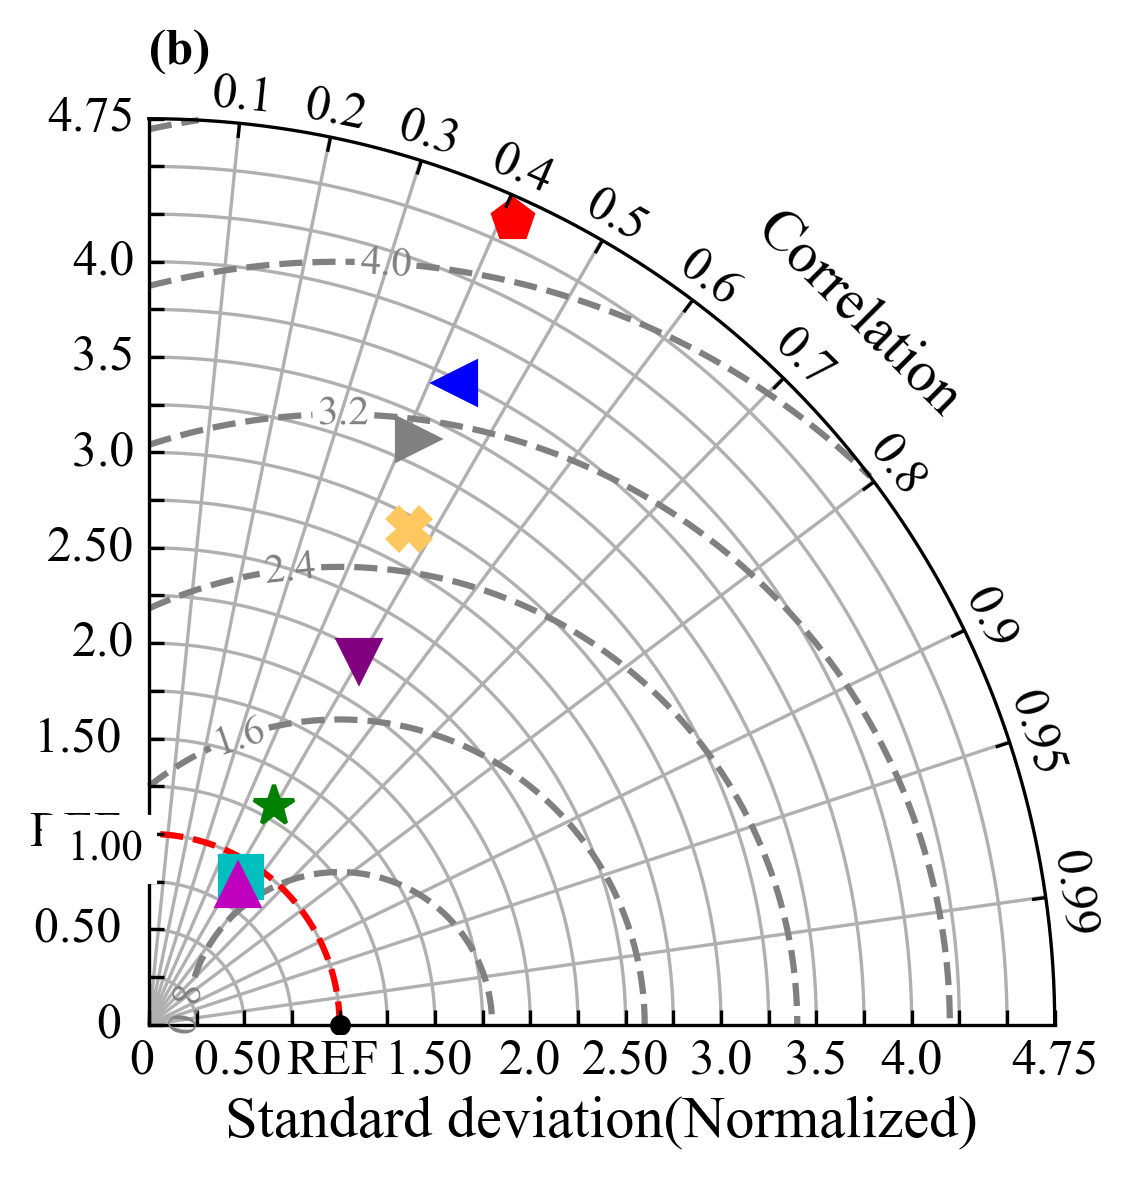

In [7]:
def set_tayloraxes(fig, location):
    trans = PolarAxes.PolarTransform()
    r1_locs = np.hstack((np.arange(1,10)/10.0,[0.95,0.99]))
    t1_locs = np.arccos(r1_locs)        
    gl1 = grid_finder.FixedLocator(t1_locs)    
    tf1 = grid_finder.DictFormatter(dict(zip(t1_locs, map(str,r1_locs))))
    r2_locs = np.arange(0,5,0.25)
    r2_labels = ['0 ', '', '0.50 ', ' ', 'REF ', ' ', '1.50 ', ' ','2.0',
                 '','2.50','','3.0','','3.5','','4.0','','','4.75']
    gl2 = grid_finder.FixedLocator(r2_locs)
    tf2 = grid_finder.DictFormatter(dict(zip(r2_locs, map(str,r2_labels))))
    ghelper = floating_axes.GridHelperCurveLinear(trans,extremes=(0,np.pi/2,0,4.75),
                                                  grid_locator1=gl1,tick_formatter1=tf1,
                                                  grid_locator2=gl2,tick_formatter2=tf2)
    ax = floating_axes.FloatingSubplot(fig, location, grid_helper=ghelper)
    fig.add_subplot(ax)

    ax.axis["top"].set_axis_direction("bottom")  
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation")
    ax.axis["top"].label.set_fontsize(14)
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard deviation(Normalized)")
    ax.axis["left"].label.set_fontsize(14)
    ax.axis["right"].set_axis_direction("top")   
    ax.axis["right"].toggle(ticklabels=True)
    ax.axis["right"].major_ticklabels.set_axis_direction("left")
    ax.axis["bottom"].set_visible(False)         
    ax.grid(True)
    polar_ax = ax.get_aux_axes(trans)   

    rs,ts = np.meshgrid(np.linspace(0,4.75,100),
                            np.linspace(0,np.pi/2,100))
    rms = np.sqrt(1 + rs**2 - 2*rs*np.cos(ts))
    CS = polar_ax.contour(ts, rs,rms,colors='gray',linestyles='--')
    plt.clabel(CS, inline=1, fontsize=10)
    t = np.linspace(0,np.pi/2)
    r = np.zeros_like(t) + 1
    polar_ax.plot(t,r,'r--')
    polar_ax.text(np.pi/2+0.032,1.02, " 1.00", size=10.3,ha="right", va="top",
                  bbox=dict(boxstyle="square",ec='w',fc='w'))

    return polar_ax

def plot_taylor(axes, refsample, sample, *args, **kwargs):
    std = np.std(refsample)/np.std(sample)
    corr = np.corrcoef(refsample, sample) 
    theta = np.arccos(corr[0,1])
    t,r = theta,std
    d = axes.plot(t,r, *args, **kwargs) 
    return d

path = '/mnt/k/jupyter_jyb/Biomass_burning/WRF-Chem输出气溶胶光学特性/AERONET与WRF-Chem时间序列比较/AAOD/'
df= pd.read_excel(path+'three_Taylor_data.xlsx',header=0)

fig = plt.figure(figsize=(4,4),facecolor='white',dpi=300)#white,grey,
ax1 = set_tayloraxes(fig, 111)
d1 = plot_taylor(ax1,df.Obs,df.GFED, '<',color='blue',markersize=10,label='GFED')
d2 = plot_taylor(ax1,df.Obs,df.FINN15, '*',color='green',markersize=10,label='FINN1.5')
d3 = plot_taylor(ax1,df.Obs,df.FINN25MOS, 'cs',markersize=10,label='FINN2.5MOS')
d4 = plot_taylor(ax1,df.Obs,df.FINN25MOSVIS, 'm^',markersize=10,label='FINN2.5MOSVIS')
d5 = plot_taylor(ax1,df.Obs,df.GFAS, 'p',color='red',markersize=10,label='GFAS')
d6 = plot_taylor(ax1,df.Obs,df.FEER, 'X',color='#FFC75F',markersize=10,label='FEER')
d7 = plot_taylor(ax1,df.Obs,df.QFED, '>',color='grey',markersize=10,label='QFED')
d8 = plot_taylor(ax1,df.Obs,df.IS4FIRES, 'v',color='purple',markersize=10,label='IS4FIRES')
d9 = plot_taylor(ax1,df.Obs,df.Obs, 'ko',markersize=4,label='obs')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
ax1.text(0.01, 1.05, '(b)', transform=ax1.transAxes, fontsize=12, fontweight='bold')
fig.savefig('01AAOD泰勒图.tif',dpi=300,format='tiff',bbox_inches = 'tight')